In [1]:
from datetime import datetime, timedelta, time
import pandas as pd
import numpy as np
import datajoint as dj
dj.conn()
from pipeline import pipeline_tools, lab, experiment, behavioranal
import matplotlib.pyplot as plt
import decimal
from scipy.stats import norm
import scipy
%matplotlib inline
from plot.plot_behavior import *

Connecting rozmar@mesoscale-activity.datajoint.io:3306


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


KeyError: 'trialnum_local_differential_income'

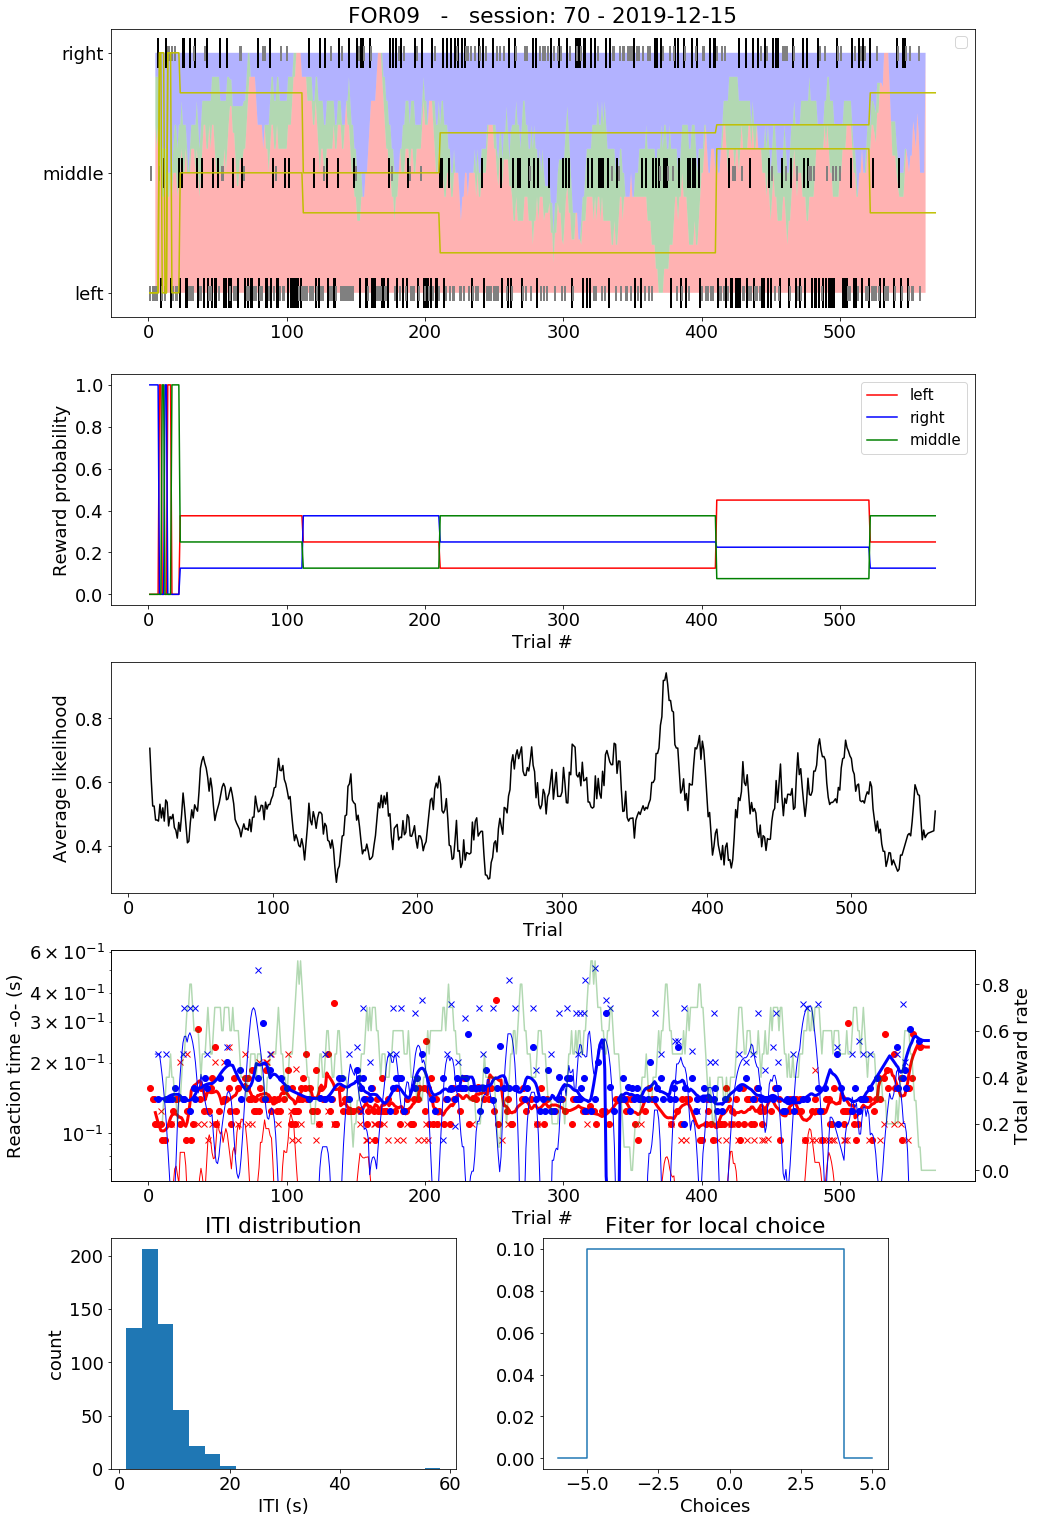

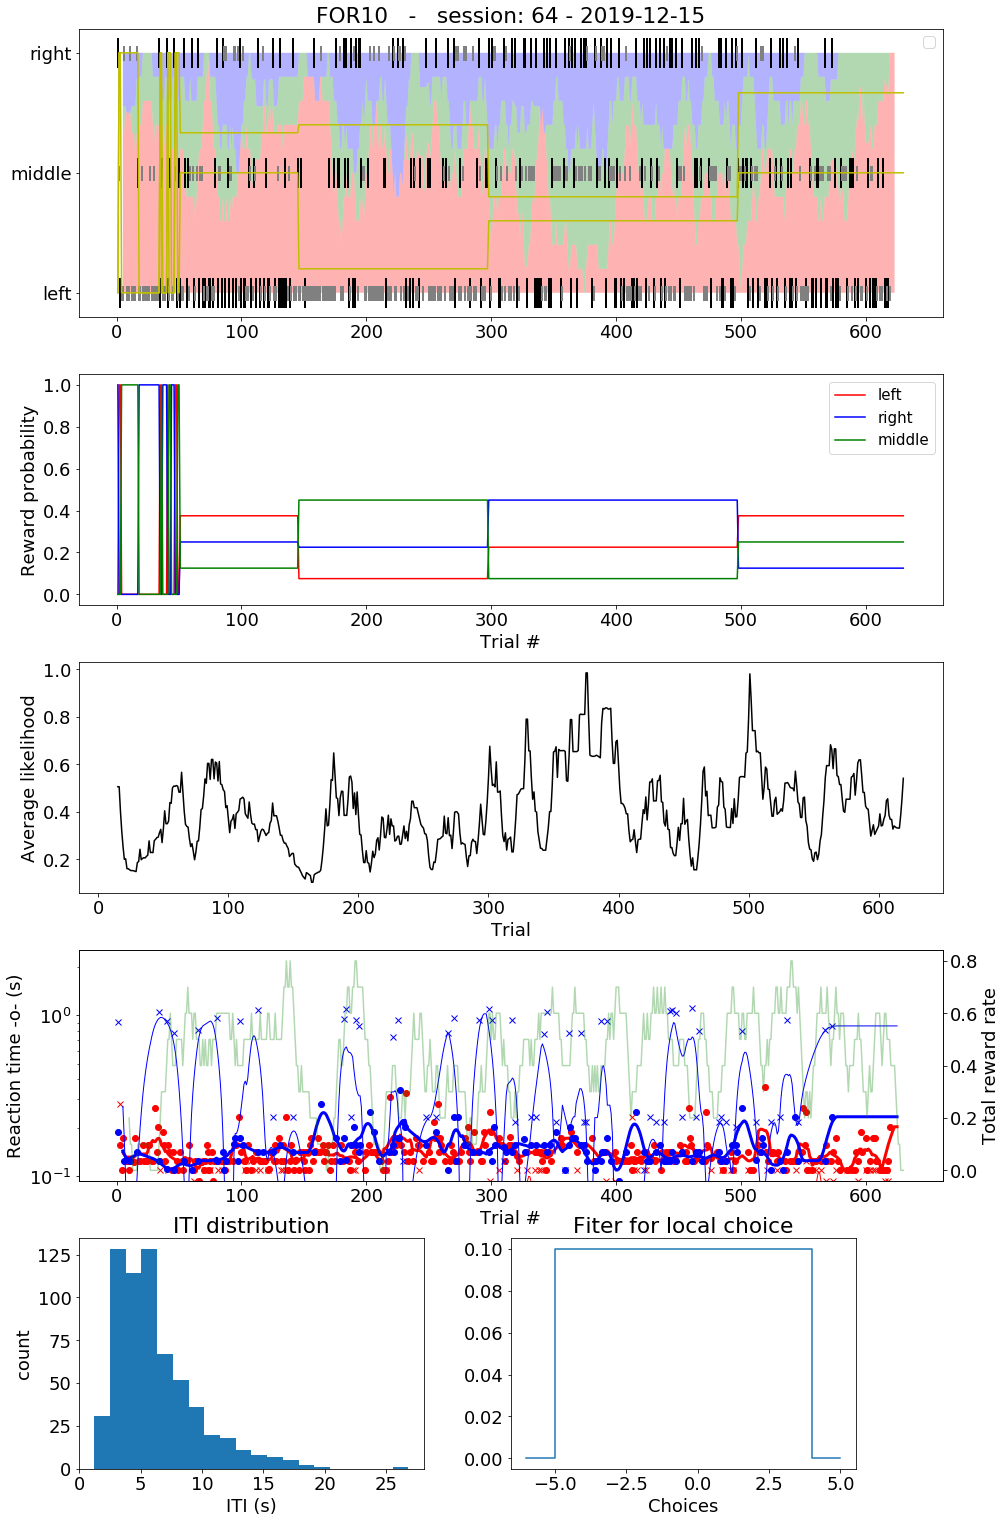

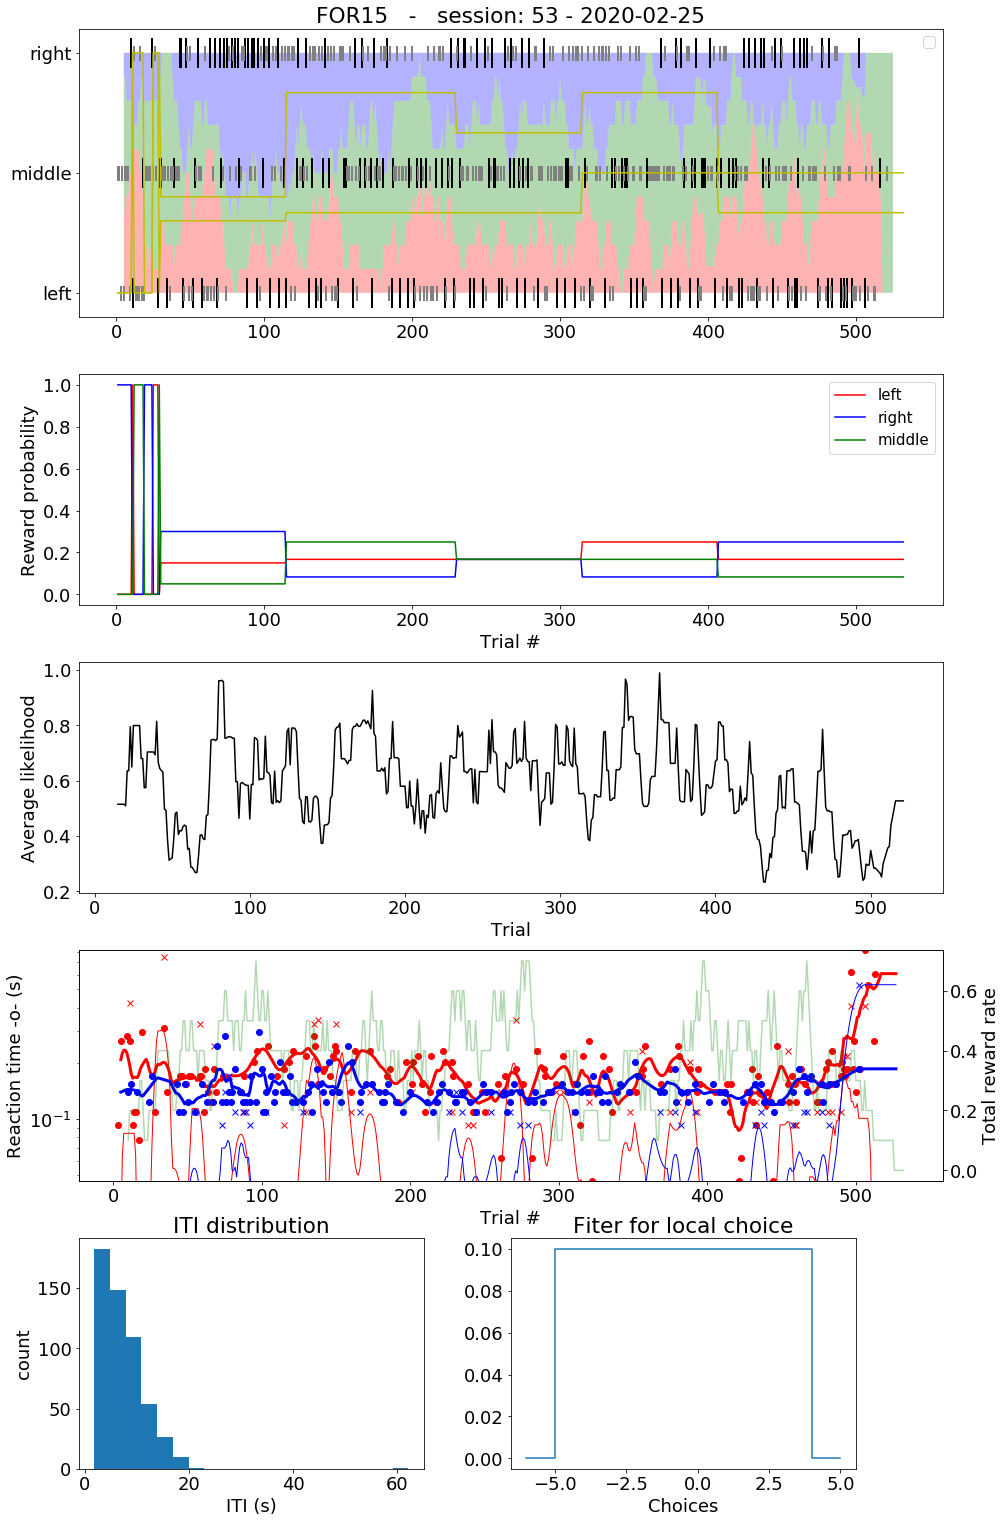

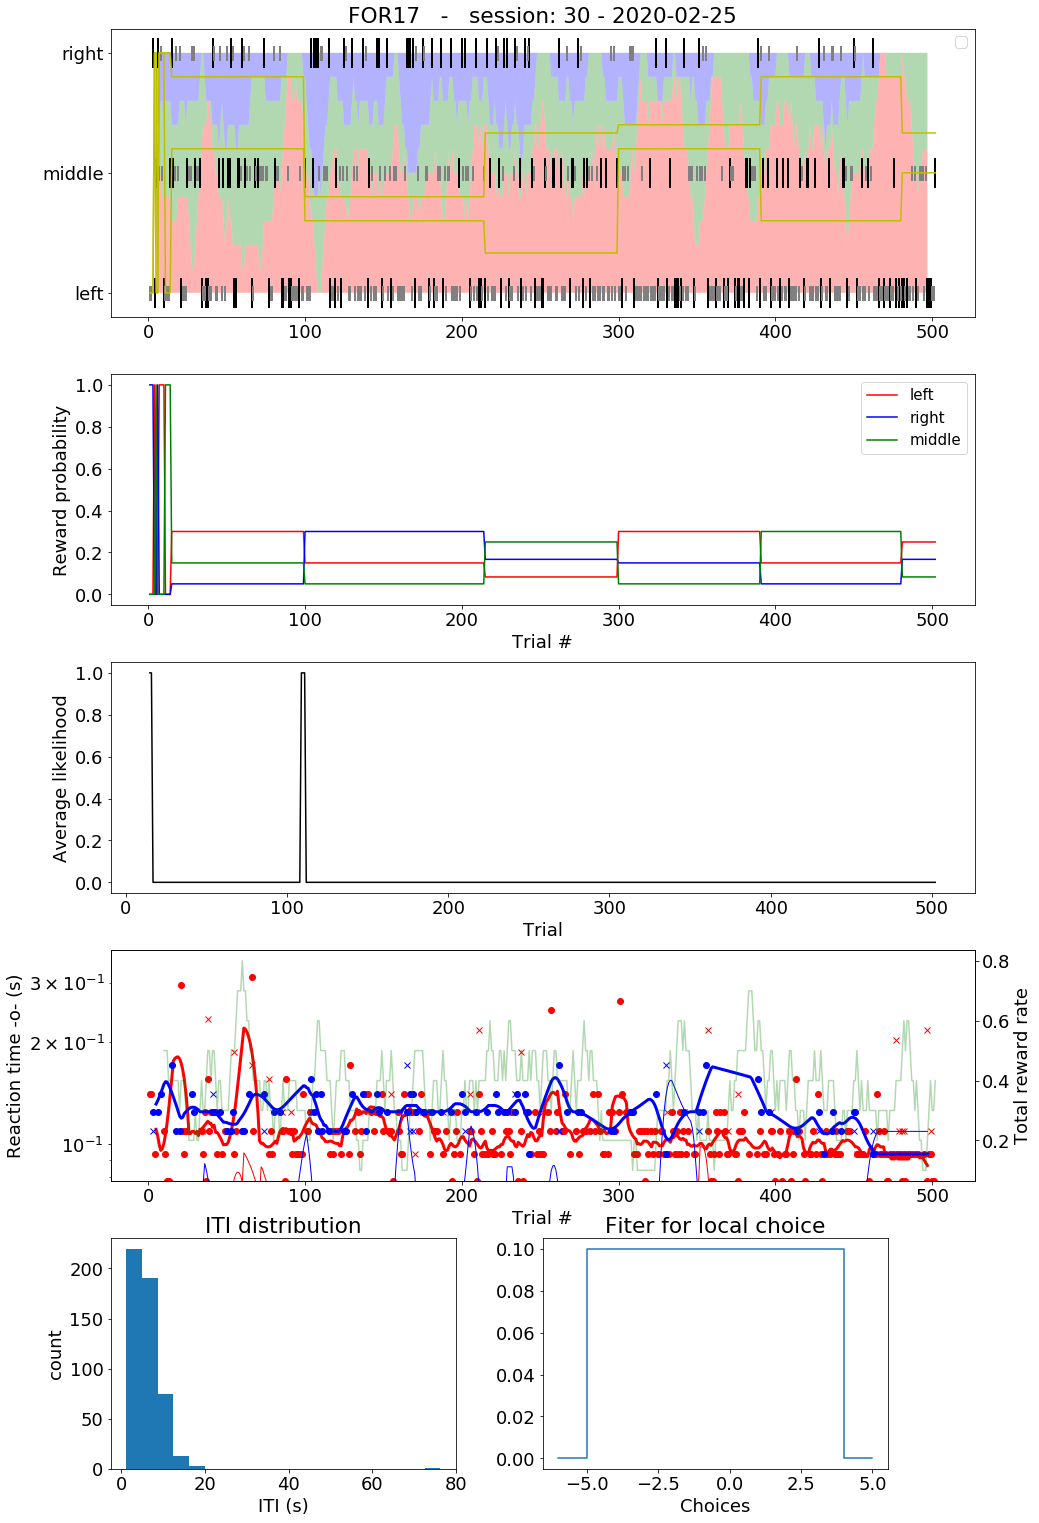

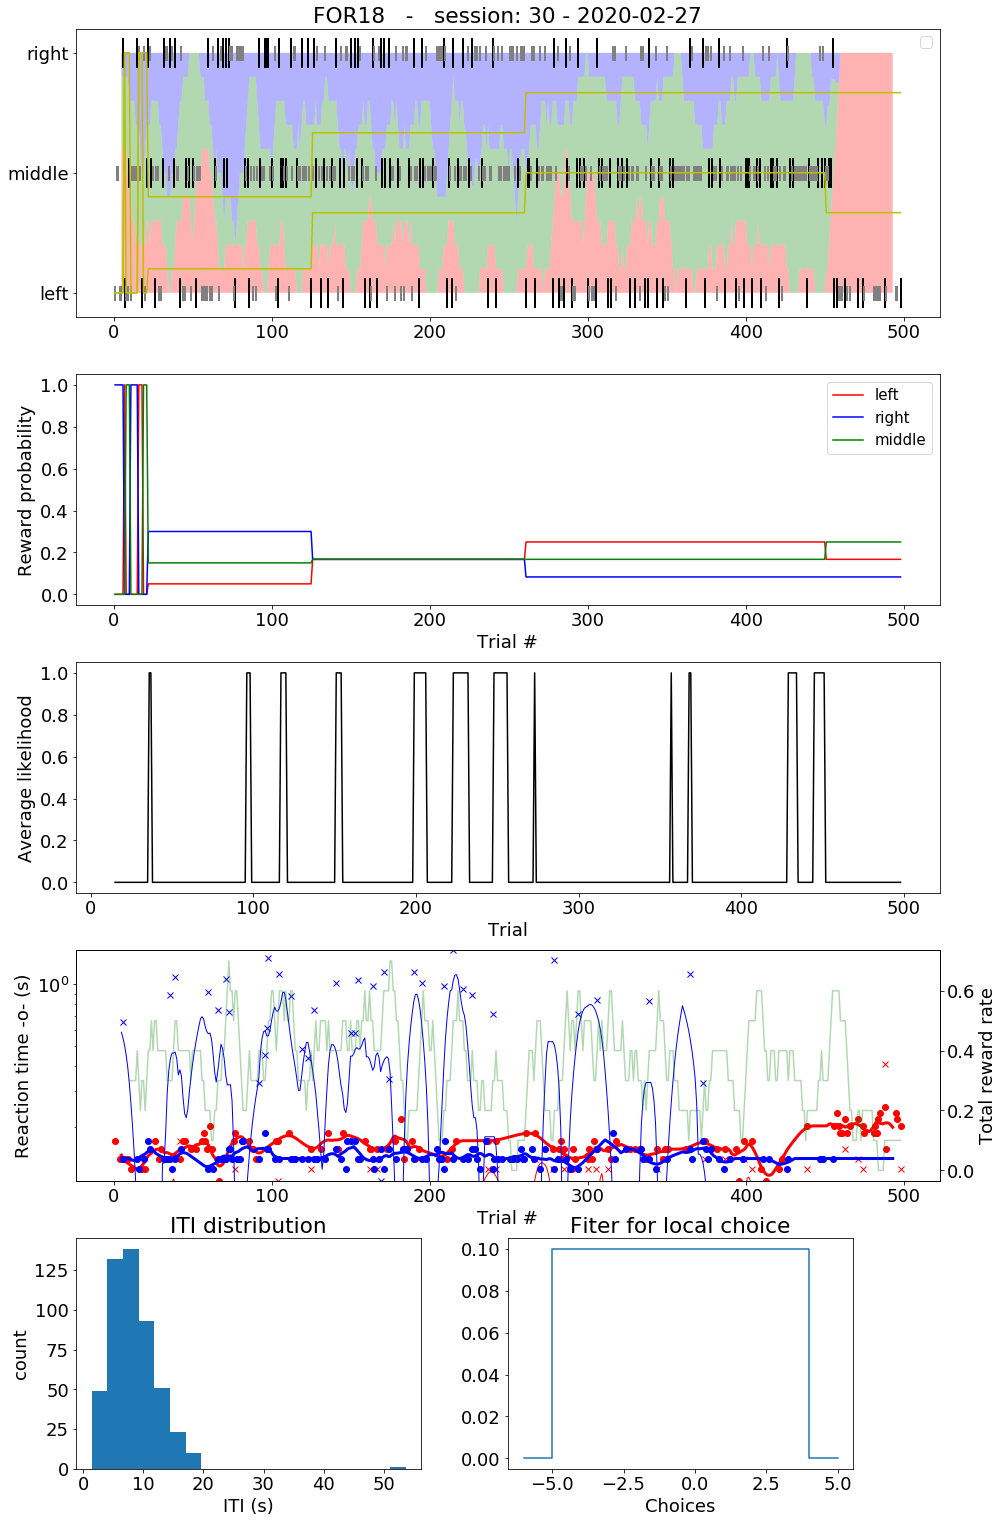

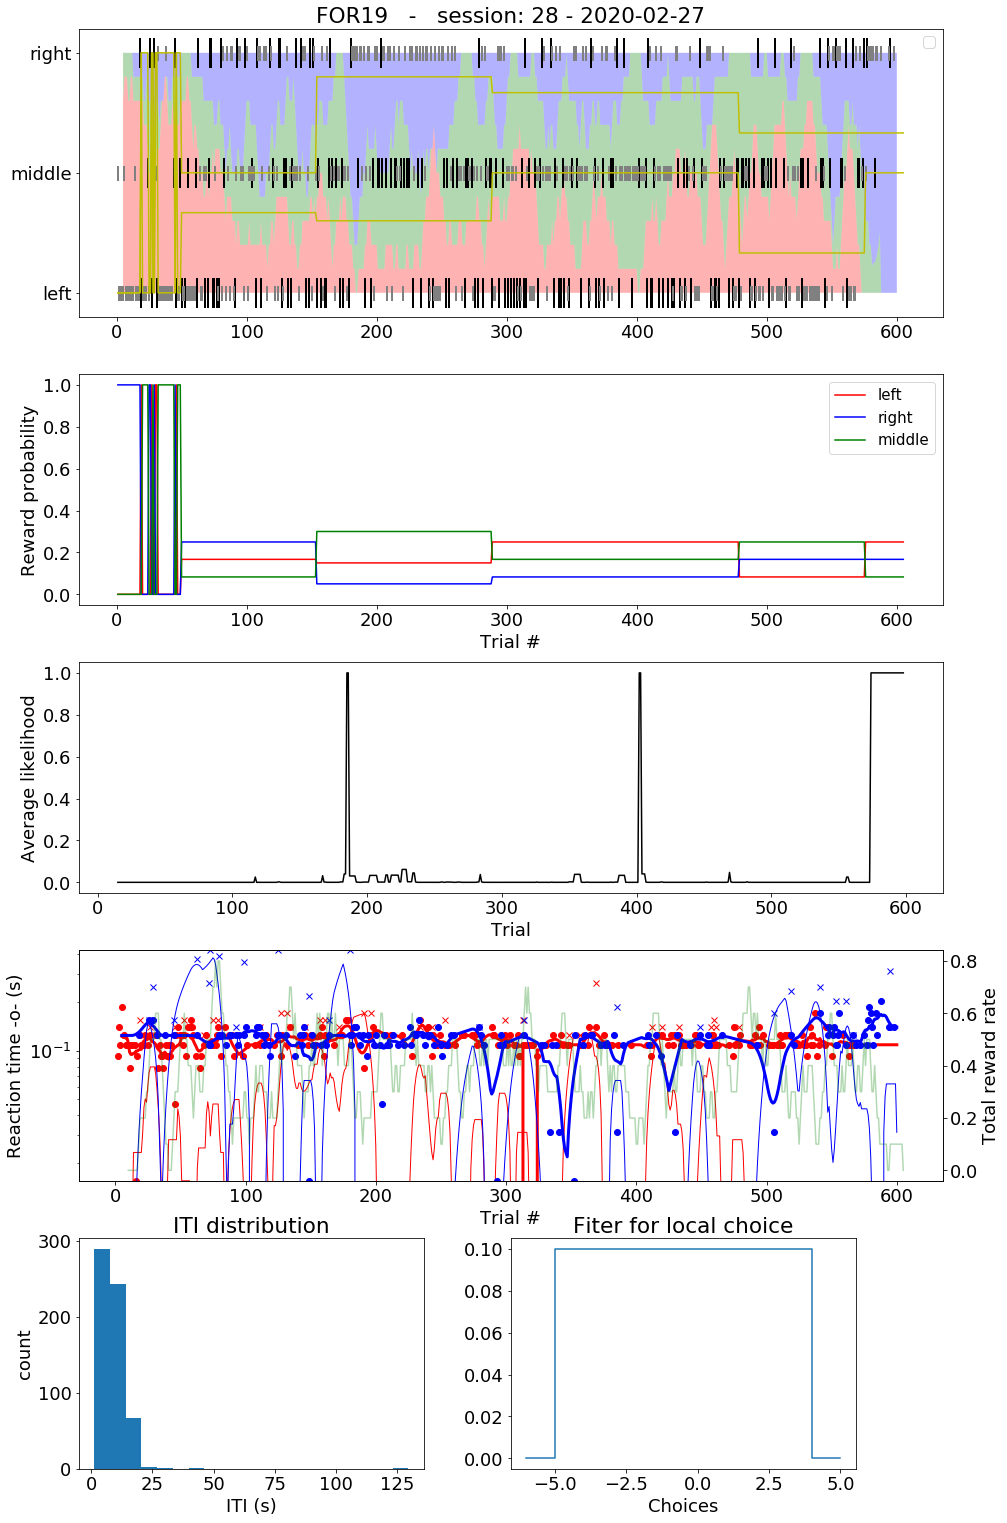

In [4]:
#plot the last session for the 3 lickport foraging mice:
plot_one_session(wr_name = 'FOR09',session = 'last')
plot_one_session(wr_name = 'FOR10',session = 'last')
plot_one_session(wr_name = 'FOR15',session = 'last')
plot_one_session(wr_name = 'FOR17',session = 'last')
plot_one_session(wr_name = 'FOR18',session = 'last')
plot_one_session(wr_name = 'FOR19',session = 'last')
plot_one_session(wr_name = 'FOR20',session = 'last')
plot_one_session(wr_name = 'HC37',session = 'last')
plot_one_session(wr_name = 'HC38',session = 'last')

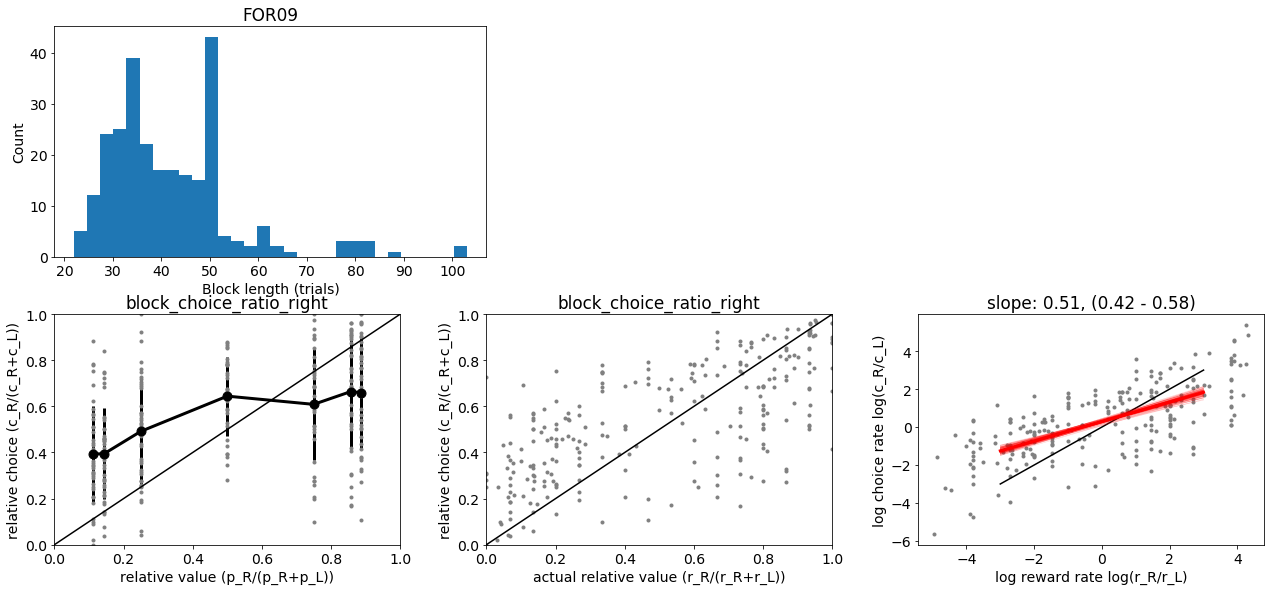

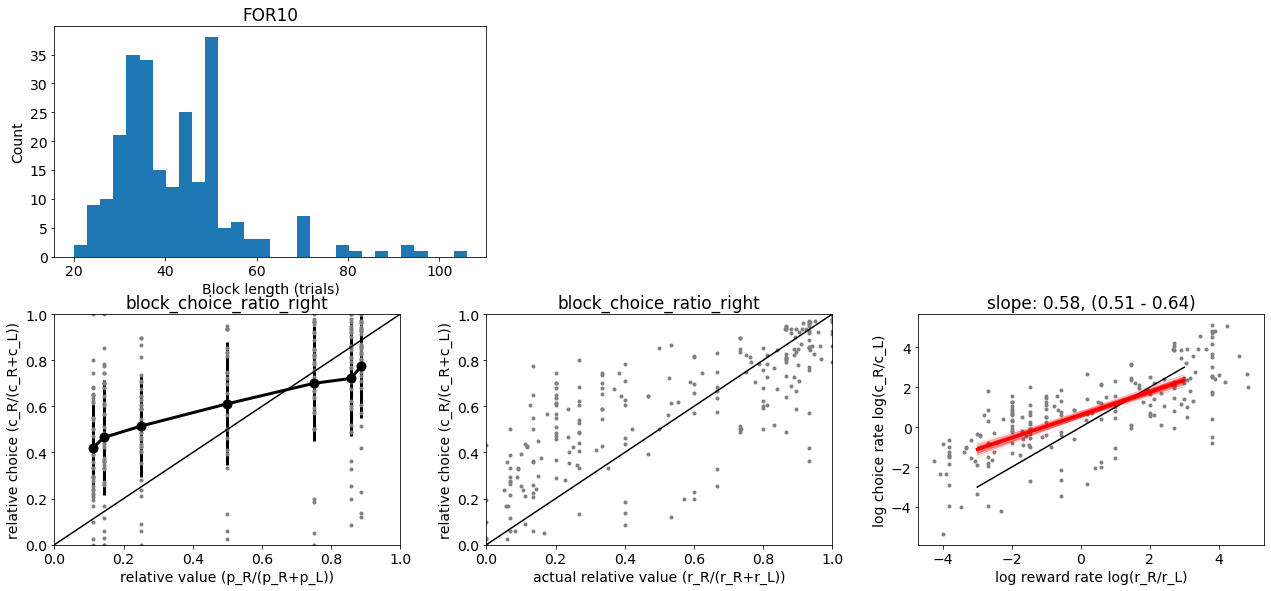

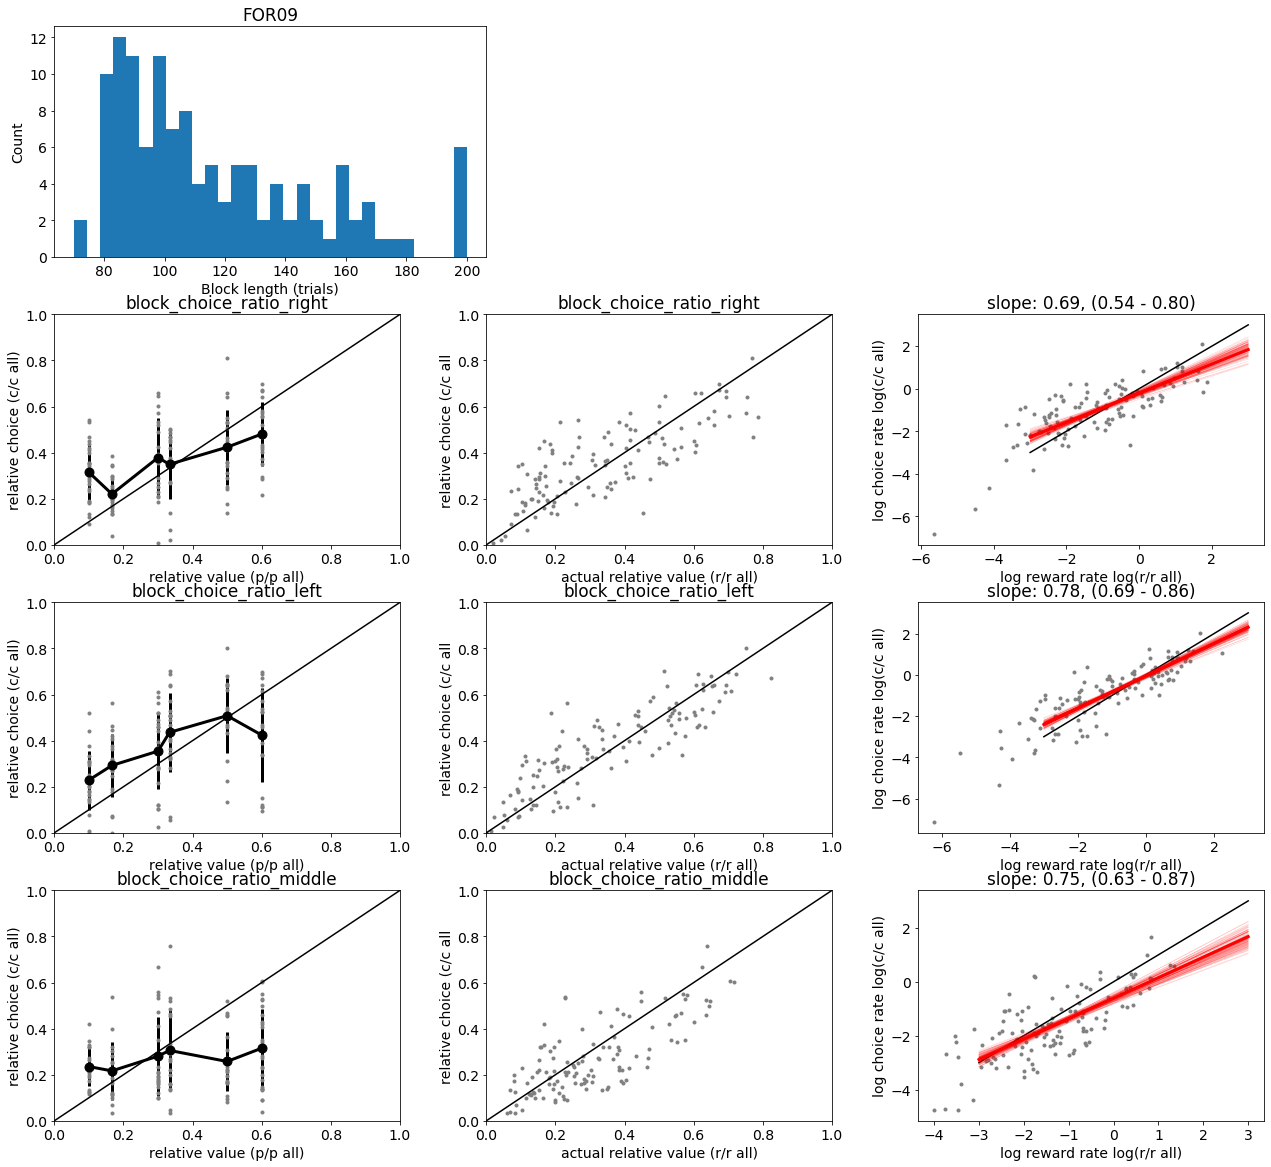

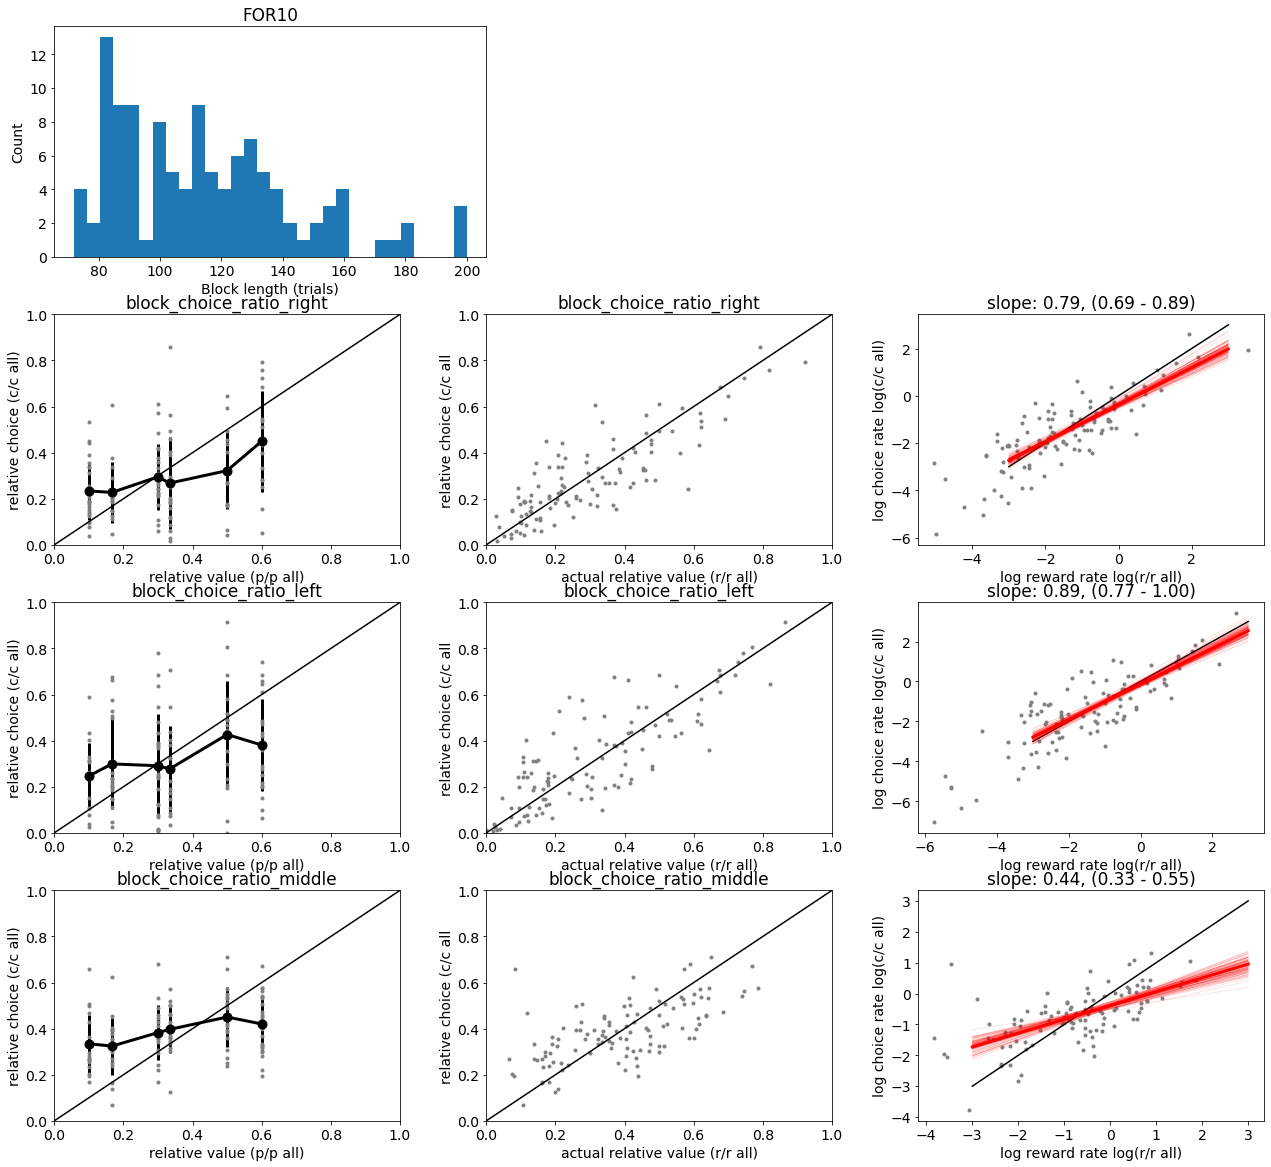

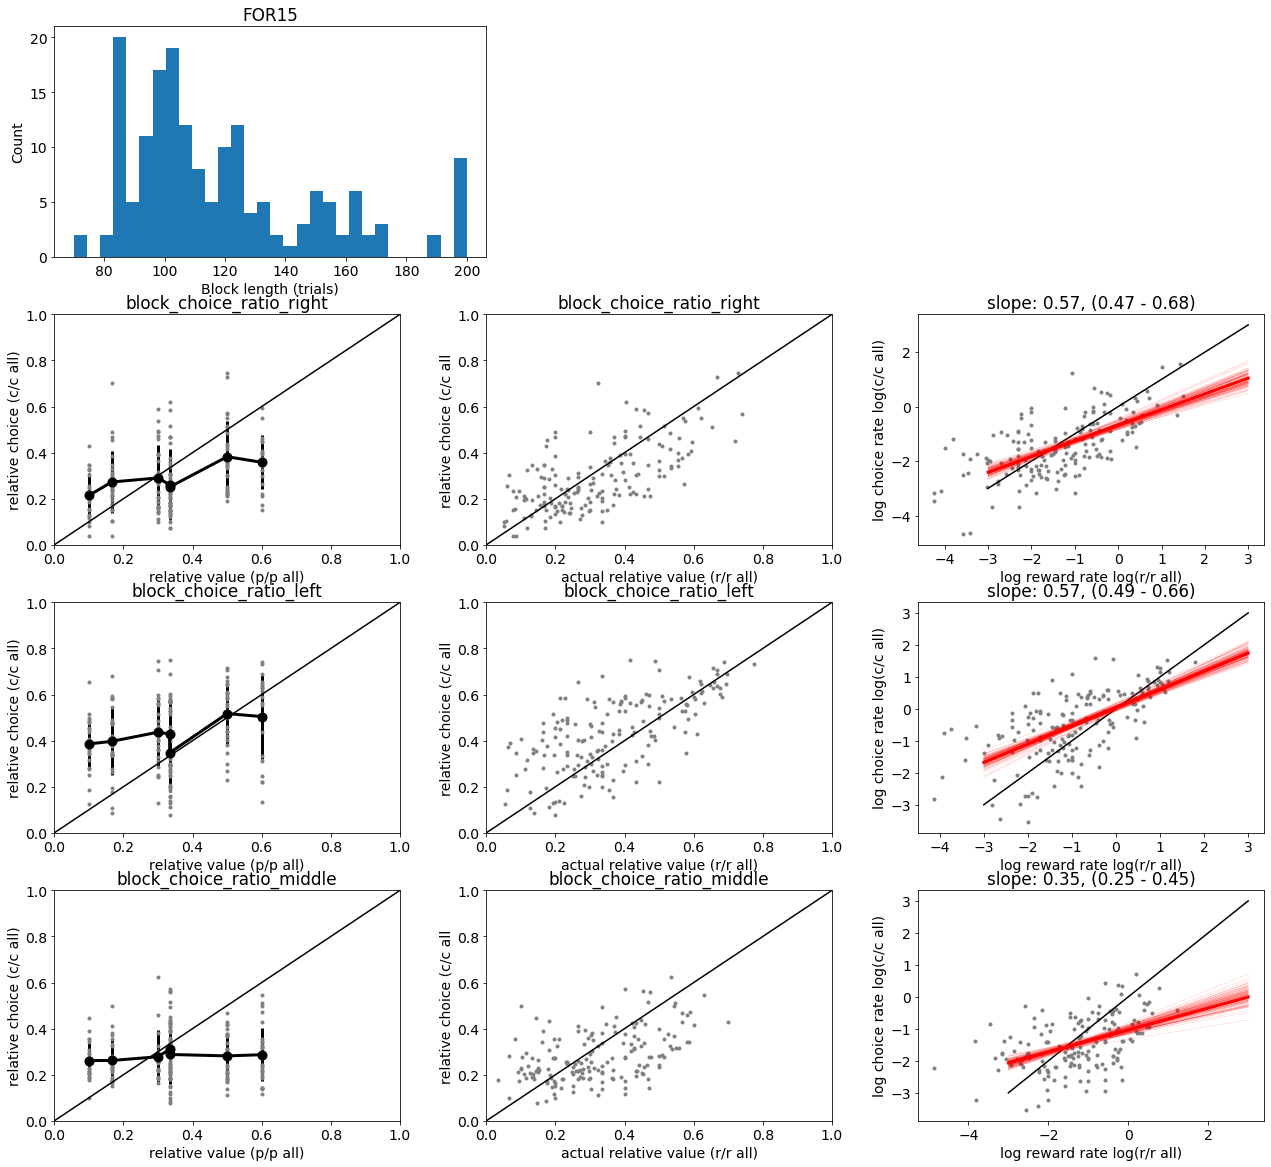

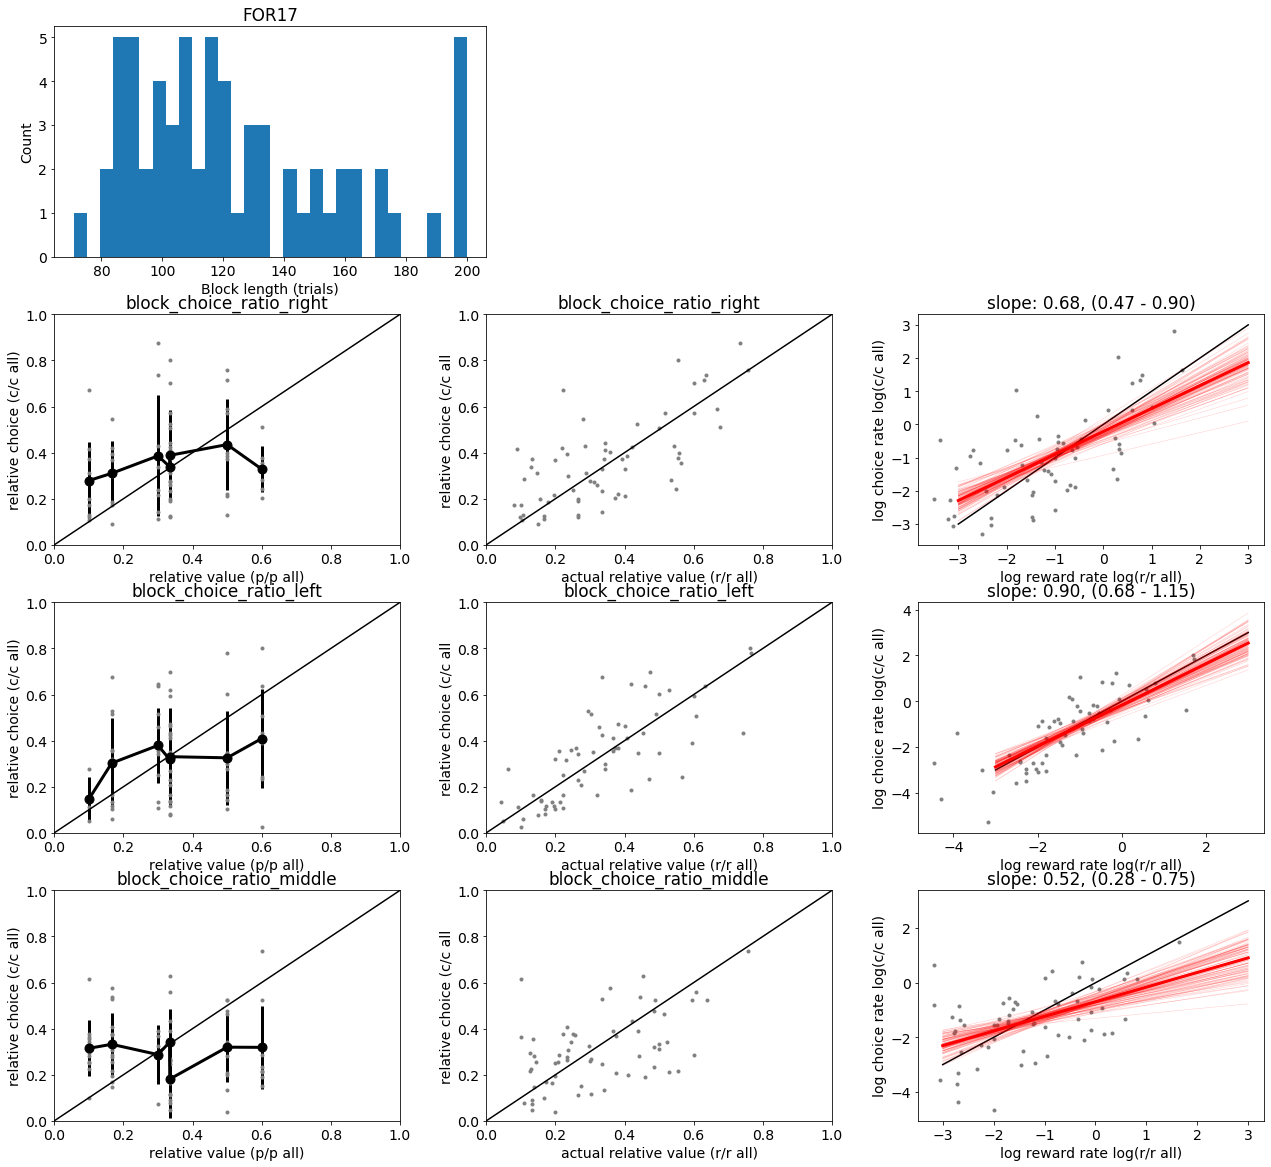

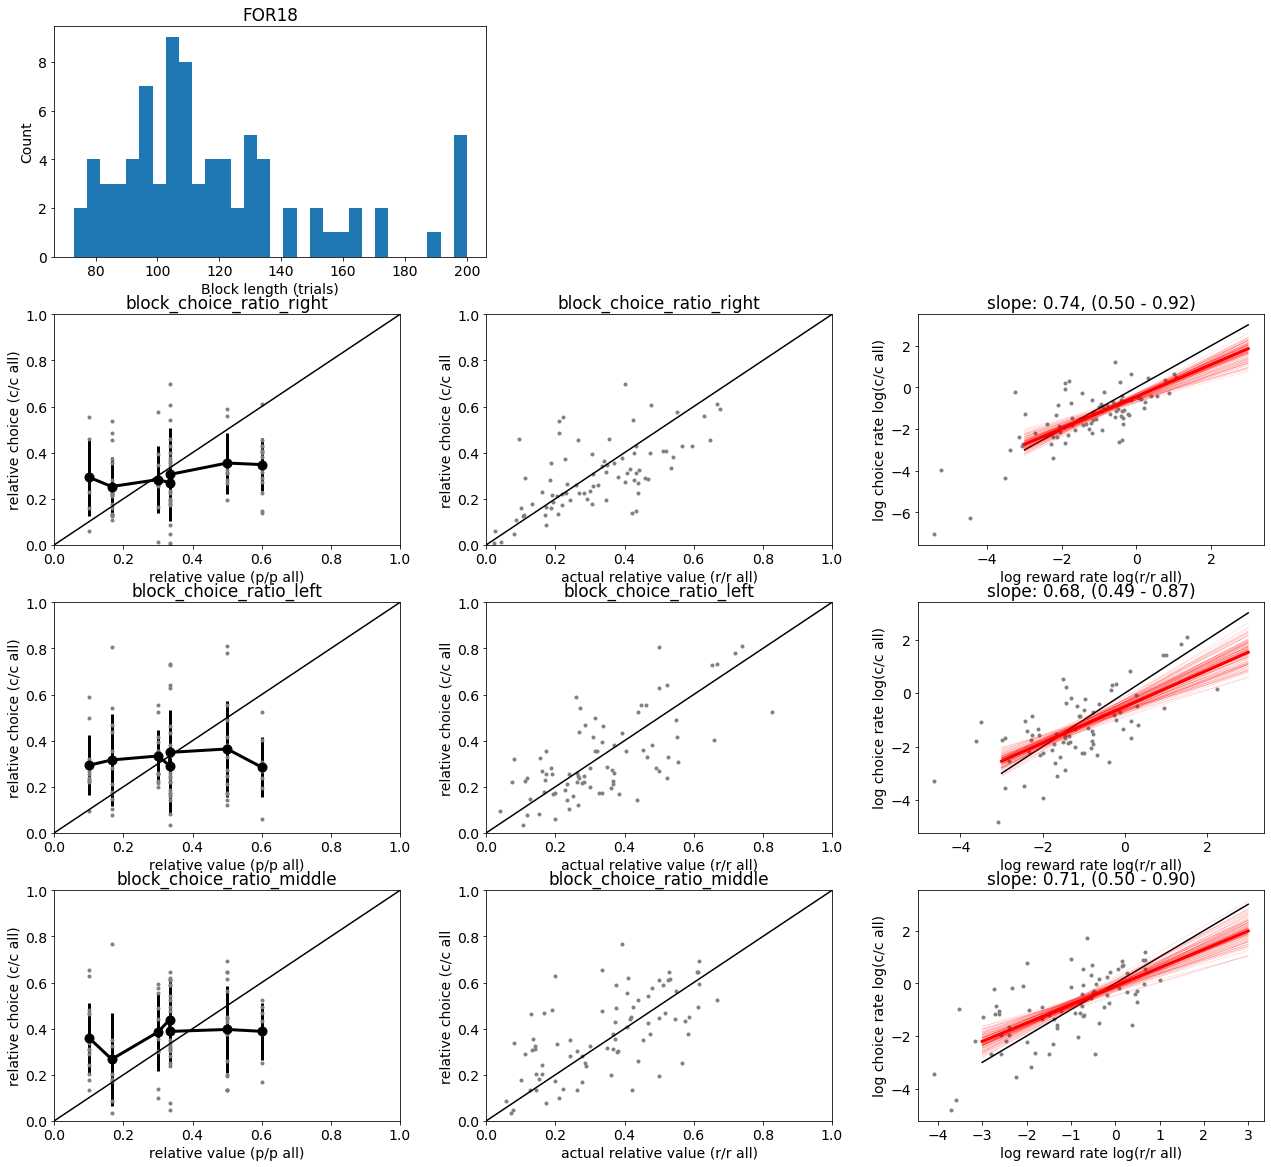

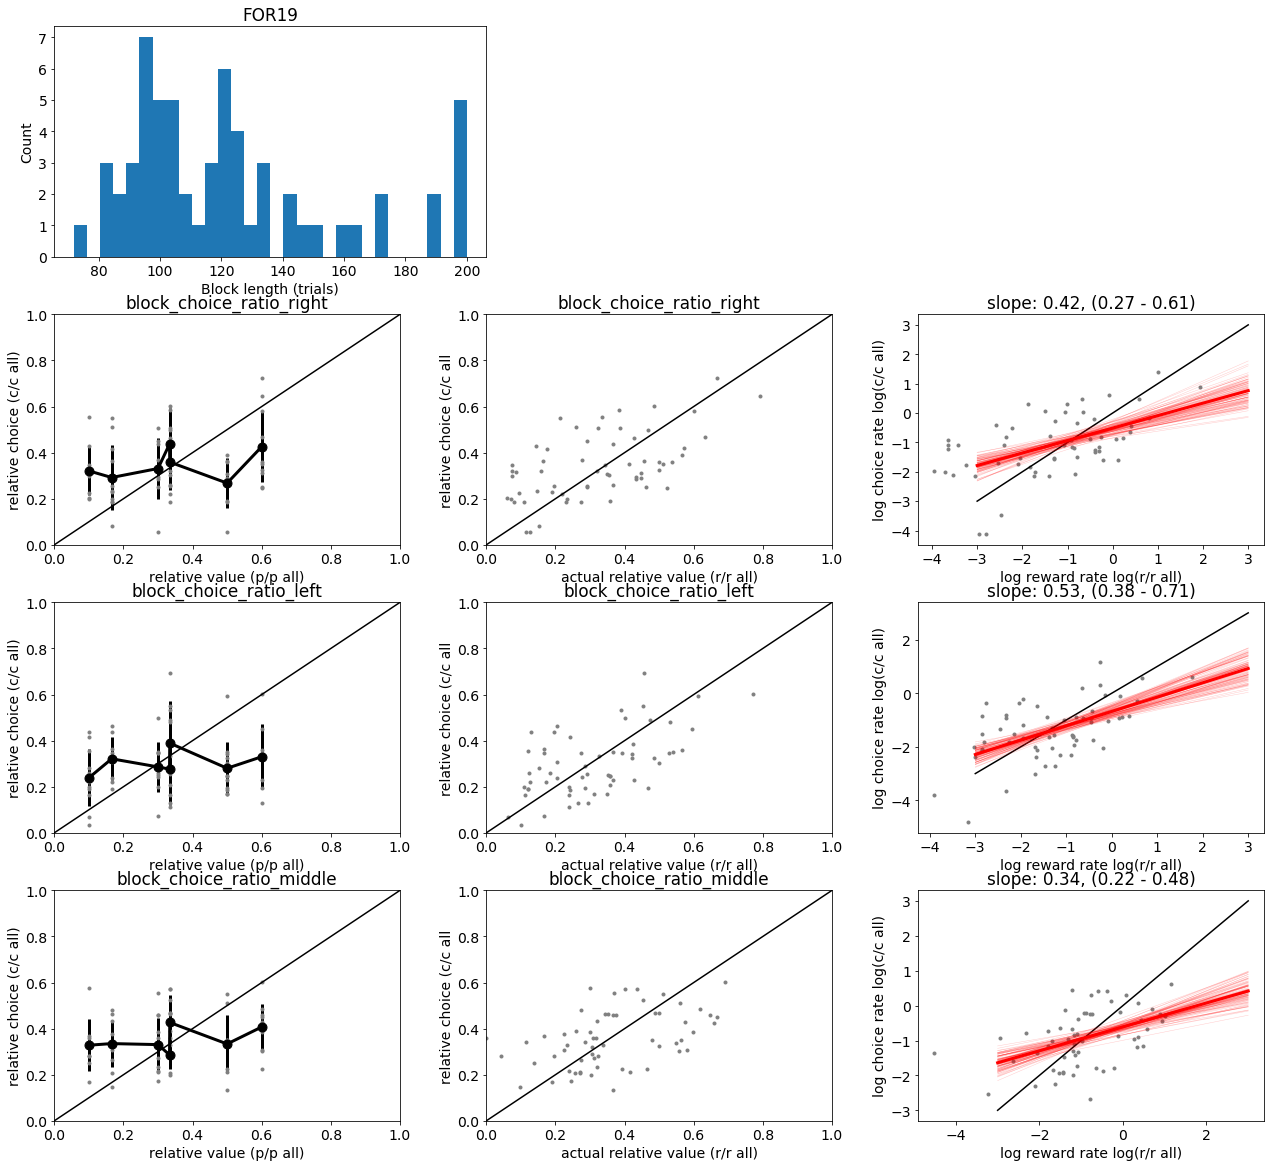

In [5]:
#block based tuning curves
min_session = 5
wr_names = ['FOR09','FOR10','FOR15','FOR17','FOR18','FOR19','FOR20','HC37','HC38']

temp = plot_block_based_tuning_curves(wr_name = 'FOR09',
                               minsession = min_session,
                               mintrialnum = 20,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
temp = plot_block_based_tuning_curves(wr_name = 'FOR10',
                               minsession = min_session,
                               mintrialnum = 20,
                               max_bias = 1,
                               bootstrapnum = 100,
                               only_blocks_above_median = False,
                               only_blocks_above_mean = False,
                               only_blocks_below_mean = False)
for wr_name in wr_names:
    temp = plot_block_based_tuning_curves_three_lickports(wr_name = wr_name,
                                   minsession = min_session,
                                   mintrialnum = 70,
                                   max_bias = 1,
                                   bootstrapnum = 100,
                                   only_blocks_above_median = False,
                                   only_blocks_above_mean = False,
                                   only_blocks_below_mean = False)

/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/rozmar/anaconda3/envs/datajoint/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


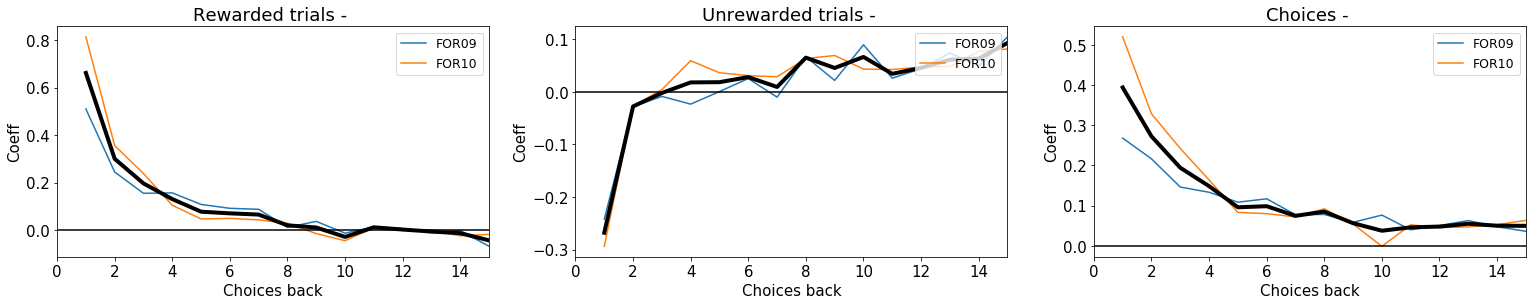

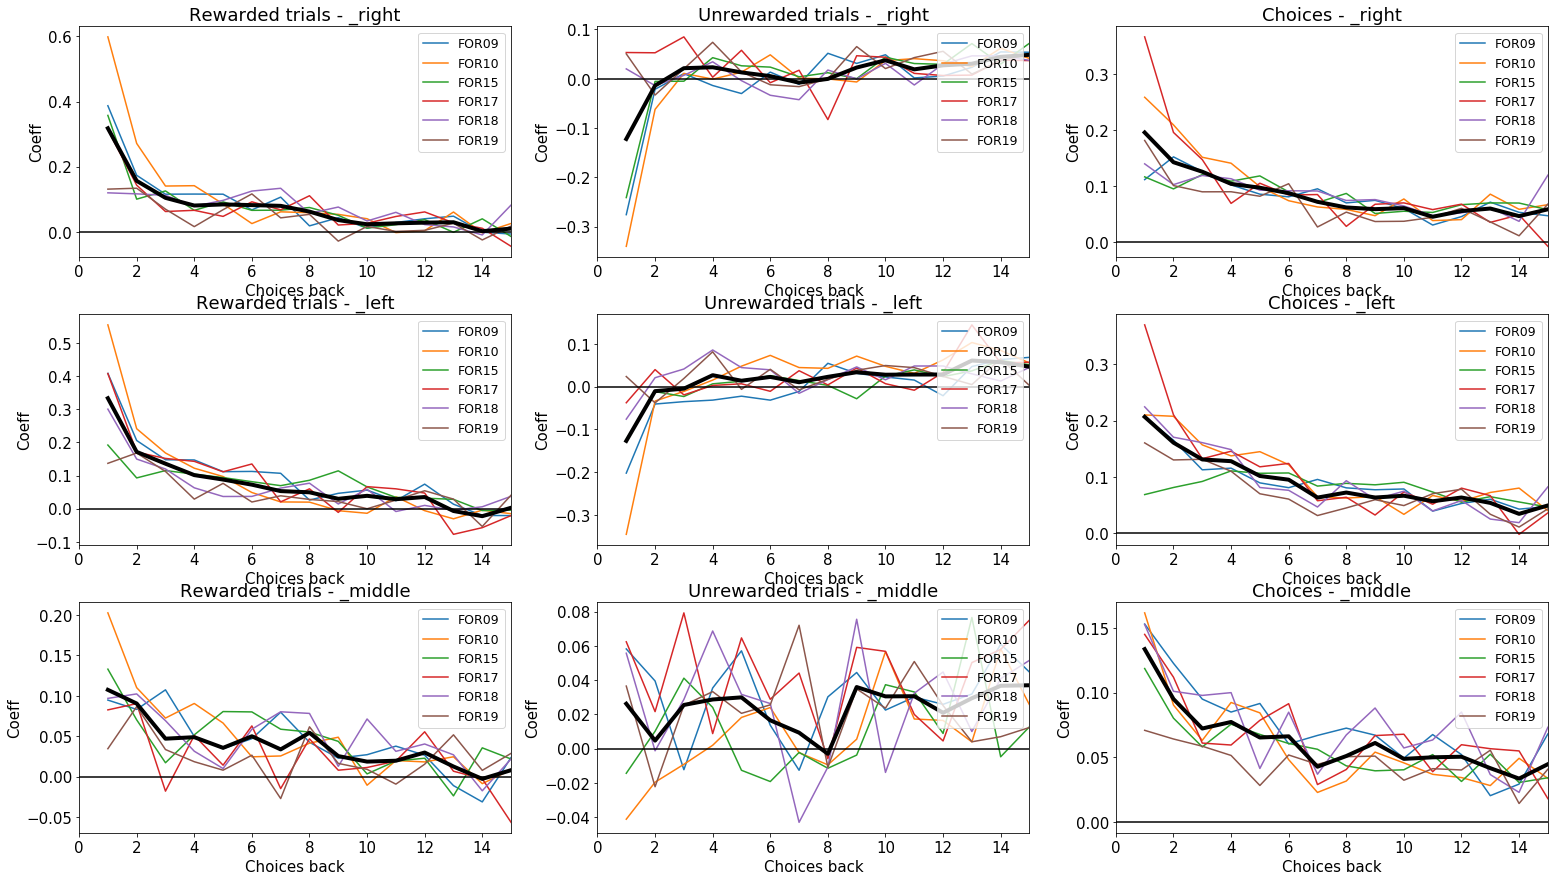

In [3]:
#plot regression coefficients
plot_regression_coefficients(plottype = 'RNRC',lickportnum = '2lp',subjects = ['FOR09','FOR10'])
plot_regression_coefficients(plottype = 'RNRC',lickportnum = '3lp',subjects = ['FOR09','FOR10','FOR15','FOR17','FOR18','FOR19','FOR20','HC37','HC3'])

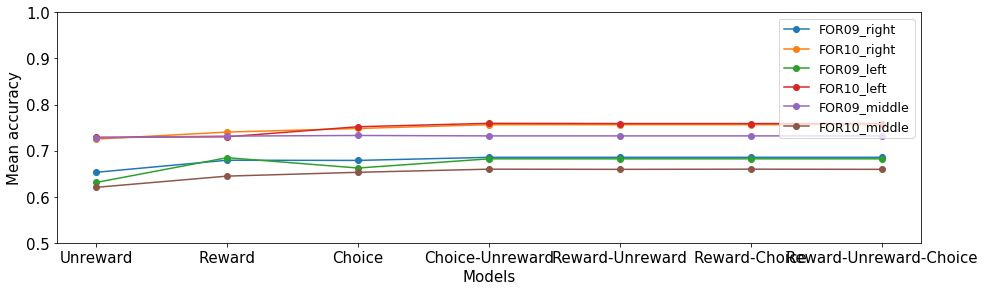

In [5]:
#gather and plot the scores for each logistic regression - this is not a nice workaround
fig=plt.figure()
ax1=fig.add_axes([0,0,2,.8])
subjects_needed = ['FOR09','FOR10','FOR15','FOR17','FOR18','FOR19','FOR20','HC37','HC38']
df_subject_wr=pd.DataFrame(lab.WaterRestriction() * experiment.Session() * behavioranal.SubjectFittedChoiceCoefficients3lpR())
subject_names = df_subject_wr['water_restriction_number'].unique()
sortidx = np.argsort(subject_names)
subject_names.sort()
sortidx_new = list()
subject_names_new = list()

for idx,name in zip(sortidx,subject_names):
    if name in subjects_needed:
        sortidx_new.append(idx)
        subject_names_new.append(name)
subject_names = subject_names_new
sortidx = np.asarray(sortidx_new)

legend = list()
for legendname,scorename in zip(['right','left','middle'],['score_subject_right','score_subject_left','score_subject_middle']):

    logistic_score_R = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpR.fetch(scorename),dtype = float)
    logistic_score_RNR = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpRNR.fetch(scorename),dtype = float)
    logistic_score_RC = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpRC.fetch(scorename),dtype = float)
    logistic_score_RNRC = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpRNRC.fetch(scorename),dtype = float)
    logistic_score_NRC = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpNRC.fetch(scorename),dtype = float)
    logistic_score_NR = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpNR.fetch(scorename),dtype = float)
    logistic_score_C = np.asarray(behavioranal.SubjectFittedChoiceCoefficients3lpC.fetch(scorename),dtype = float)


    logistic_score_R= logistic_score_R[sortidx]
    logistic_score_RNR= logistic_score_RNR[sortidx]
    logistic_score_RC= logistic_score_RC[sortidx]
    logistic_score_RNRC= logistic_score_RNRC[sortidx]
    logistic_score_NRC= logistic_score_NRC[sortidx]
    logistic_score_NR= logistic_score_NR[sortidx]
    logistic_score_C= logistic_score_C[sortidx]

    for r,rnr,rc,rnrc,nrc,nr,c,name in zip(logistic_score_R,
                                           logistic_score_RNR,
                                           logistic_score_RC,
                                           logistic_score_RNRC,
                                           logistic_score_NRC,
                                           logistic_score_NR,
                                           logistic_score_C,
                                           subject_names,
                                          ):
        legend.append(name+'_'+legendname)
        if 'FOR' in name or 'HC' in name:
            ax1.plot(['Unreward','Reward','Choice','Choice-Unreward','Reward-Unreward','Reward-Choice','Reward-Unreward-Choice'],[nr,r,c,nrc,rnr,rc,rnrc],'o-')
        else:
            ax1.plot(['Unreward','Reward','Choice','Choice-Unreward','Reward-Unreward','Reward-Choice','Reward-Unreward-Choice'],[nr,r,c,nrc,rnr,rc,rnrc],'o--')

ax1.set_ylabel('Mean accuracy')
ax1.set_xlabel('Models')
ax1.set_ylim([.5,1])
ax1.legend(legend,fontsize='small',loc = 'upper right')


In [6]:
#pull raw behavior data for a single subject
subject_name = 'FOR10' # select a subject
subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+subject_name+'"').fetch('subject_id')[0]# get the unique subject ID - this is necessary for fetching the data
subject_id

457498

In [7]:
# these are all the trials for this subject
table = experiment.BehaviorTrial() & 'subject_id = ' +str(subject_id) 
table

subject_id institution 6 digit animal ID,session session number,trial trial number,block block number,task task type,task_protocol task protocol,trial_instruction,trial_choice,early_lick,outcome
457498,1,1,1,foraging,100,None,none,no early,ignore
457498,1,2,1,foraging,100,None,none,no early,ignore
457498,1,3,1,foraging,100,None,right,no early,hit
457498,1,4,1,foraging,100,None,none,no early,ignore
457498,1,5,1,foraging,100,None,right,no early,hit
457498,1,6,1,foraging,100,None,none,early,ignore
457498,1,7,1,foraging,100,None,right,early,hit


In [8]:
# and the trials where the task was on 3 lickports ('session_task_protocol = 101' in the table behavioranal.SessionTrainingType())
table = experiment.BehaviorTrial() * behavioranal.SessionTrainingType() & 'subject_id = ' +str(subject_id) & 'session_task_protocol = 101'
table

subject_id institution 6 digit animal ID,session session number,trial trial number,block block number,task task type,task_protocol task protocol,trial_instruction,trial_choice,early_lick,outcome,session_task_protocol the number of the dominant task protocol in the session
457498,37,1,1,foraging 3lp,101,None,none,no early,ignore,101
457498,37,2,1,foraging 3lp,101,None,left,early,hit,101
457498,37,3,1,foraging 3lp,101,None,left,no early,hit,101
457498,37,4,1,foraging 3lp,101,None,left,no early,hit,101
457498,37,5,1,foraging 3lp,101,None,middle,early,hit,101
457498,37,6,1,foraging 3lp,101,None,middle,early,hit,101
457498,37,7,1,foraging 3lp,101,None,middle,early,hit,101


In [9]:
# and the trials where the pretraining or bias check was over ('trial > session_pretraining_trial_num' in the behavioranal.SessionStats() table)
table = experiment.BehaviorTrial() * behavioranal.SessionStats() * behavioranal.SessionTrainingType() & 'subject_id = ' +str(subject_id) & 'trial > session_pretraining_trial_num' & 'session_task_protocol = 101'
table

subject_id institution 6 digit animal ID,session session number,trial trial number,block block number,task task type,task_protocol task protocol,trial_instruction,trial_choice,early_lick,outcome,session_trialnum number of trials,session_blocknum number of blocks,session_hits number of hits,session_misses number of misses,session_ignores number of ignores,session_autowaters number of autowaters,session_length length of the session in seconds,session_pretraining_trial_num number of pretraining trials,session_1st_3_ignores trialnum where the first three ignores happened in a row,session_1st_2_ignores trialnum where the first three ignores happened in a row,session_1st_ignore trialnum where the first ignore happened,session_task_protocol the number of the dominant task protocol in the session
457498,41,96,7,foraging 3lp,101,None,left,no early,hit,716,11,282,407,27,0,4464.2905,95,568,553,610,101
457498,41,97,7,foraging 3lp,101,None,left,no early,hit,716,11,282,407,27,0,4464.2905,95,568,553,610,101
457498,41,98,7,foraging 3lp,101,None,left,no early,miss,716,11,282,407,27,0,4464.2905,95,568,553,610,101
457498,41,99,7,foraging 3lp,101,None,left,no early,miss,716,11,282,407,27,0,4464.2905,95,568,553,610,101
457498,41,100,7,foraging 3lp,101,None,left,no early,miss,716,11,282,407,27,0,4464.2905,95,568,553,610,101
457498,41,101,7,foraging 3lp,101,None,left,no early,miss,716,11,282,407,27,0,4464.2905,95,568,553,610,101
457498,41,102,7,foraging 3lp,101,None,left,no early,miss,716,11,282,407,27,0,4464.2905,95,568,553,610,101


In [10]:
#TO DO
#we can also get rid of the trials at the end of each session when the mouse wasn't really paying attention 
#e.g. when the cumulative ignore trials exceed a given number or the mouse ignores several trials in a row
#or when the reward rate drops..

In [11]:
#let's get the session number, trial number, the choice and the outcome of these trials
data = table.fetch('session','trial','trial_choice','outcome')
data

[array([41, 41, 41, ..., 65, 65, 65]),
 array([ 96,  97,  98, ..., 521, 522, 523]),
 array(['left', 'left', 'left', ..., 'none', 'none', 'right'], dtype=object),
 array(['hit', 'hit', 'miss', ..., 'ignore', 'ignore', 'hit'], dtype=object)]

In [12]:
#get the random seeds
table_random_seeds = experiment.BehaviorTrial() * behavioranal.SessionStats() * behavioranal.SessionTrainingType() * experiment.TrialNote() & 'subject_id = ' +str(subject_id) & 'trial > session_pretraining_trial_num' & 'session_task_protocol = 101' & 'trial_note_type = "random_seed_start"'
random_seed_data = table_random_seeds.fetch('session','trial','trial_note')
random_seed_data

[array([41, 42, 43, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 53, 53, 53,
        53, 53, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 array([ 96,   1,  48, 132, 124,  47,  56,  36,  48,  69, 125,  24,  69,
        219, 302, 350, 419, 435, 458, 471, 115,  65,  70, 104,  34,  88,
         33,  61,  93,  49,  51,  99]),
 array(['323', '324', '325', '325', '326', '327', '328', '329', '330',
        '331', '332', '333', '334', '335', '335', '335', '335', '335',
        '335', '335', '337', '338', '339', '341', '343', '344', '345',
        '346', '347', '348', '349', '350'], dtype=object)]

In [15]:
#iterate over all the subjects
#get the subject names (eg. 'FOR01','FOR02'...)
subject_names = lab.WaterRestriction().fetch('water_restriction_number') # fetch all the subject names
subject_names.sort() #sort it to look nicer

#subject_names = ['FOR09','FOR10'] # or name subjects manually

for subject_name in subject_names: # iterate over the subjects
    subject_id = (lab.WaterRestriction() & 'water_restriction_number = "'+subject_name+'"').fetch('subject_id')[0]# get the unique subject ID - this is necessary for fetching the data
    table = experiment.BehaviorTrial() * behavioranal.SessionStats() * behavioranal.SessionTrainingType() & 'subject_id = ' +str(subject_id) & 'trial > session_pretraining_trial_num' & 'session_task_protocol = 101'
    if len(table) >0: # proceed only if that particular mouse has some trials
        print(subject_name)
        # you fetch what you need

FOR09
FOR10
